# VGG-16 Model 1a
## Preprocessing method: ImageDataGenerator()
## Image size: (224, 224) 
## Images: Grayscale
## Frozen pretrained layers
## Image transformation

In [1]:
import pandas as pd
import numpy as np
import io
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
path_training = 'gender_images/Training/'
path_validation = 'gender_images/Validation/'

In [3]:
image_size = (224, 224)
batch_size = 128


datagen_transform = ImageDataGenerator(
    rescale =1./255,
    validation_split=.2,
    rotation_range=20,
    width_shift_range=.2,
    height_shift_range=.2,
    shear_range=.2,
    zoom_range=.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

datagen_val = ImageDataGenerator(
    rescale = 1./255,
)

train_ds = datagen_transform.flow_from_directory(
    path_training,
    seed=1993,
    target_size=image_size,
    batch_size=batch_size,
    classes=['female','male'],
    shuffle=True,
    color_mode="grayscale"
)

val_ds = datagen_transform.flow_from_directory(
    path_validation,
    seed=1993,
    target_size=image_size,
    batch_size=batch_size,
    classes=['female','male'],
    shuffle=True,
    color_mode="grayscale"
)

Found 47009 images belonging to 2 classes.
Found 11649 images belonging to 2 classes.


In [6]:
vgg_model = keras.applications.VGG16(weights='imagenet', include_top=True)
vgg_model.trainable = False

# Model layers
input_tensor = tf.keras.layers.Input(shape=(224, 224, 1))
x = keras.layers.Conv2D(3,(3,3),padding='same')(input_tensor)
x = vgg_model(x)
out = keras.layers.Dense(2, activation='softmax')(x)

# Set early stopping after certain number of epochs
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
epochs=1000     # Set epochs

# Generate model
model = keras.Model(inputs = input_tensor, outputs = out)
model.compile(optimizer=keras.optimizers.Adam(1e-2),
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

553467096/553467096 [==============================] - 35s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 3)       30        
                                                                 
 vgg16 (Functional)          (None, 1000)              138357544 
                                                                 
 dense (Dense)               (None, 2)                 2002      
                                                                 
Total params: 138,359,576
Trainable params: 2,032
Non-trainable params: 138,357,544
_________________________________________________________________


In [7]:
vgg16_fit = model.fit(train_ds, 
                      epochs=epochs, 
                      validation_data=val_ds,
                      callbacks=[callback])

Epoch 1/1000
368/368 [==============================] - 206s 476ms/step - loss: 0.6786 - accuracy: 0.5985 - val_loss: 0.6647 - val_accuracy: 0.6260
Epoch 2/1000
368/368 [==============================] - 166s 449ms/step - loss: 0.6506 - accuracy: 0.6365 - val_loss: 0.6398 - val_accuracy: 0.6446
Epoch 3/1000
368/368 [==============================] - 166s 450ms/step - loss: 0.6324 - accuracy: 0.6486 - val_loss: 0.6290 - val_accuracy: 0.6492
Epoch 4/1000
368/368 [==============================] - 166s 450ms/step - loss: 0.6198 - accuracy: 0.6608 - val_loss: 0.6149 - val_accuracy: 0.6669
Epoch 5/1000
368/368 [==============================] - 167s 452ms/step - loss: 0.6109 - accuracy: 0.6705 - val_loss: 0.6094 - val_accuracy: 0.6789
Epoch 6/1000
368/368 [==============================] - 167s 454ms/step - loss: 0.5996 - accuracy: 0.6891 - val_loss: 0.5942 - val_accuracy: 0.6902
Epoch 7/1000
368/368 [==============================] - 167s 454ms/step - loss: 0.5852 - accuracy: 0.6963 - val_

<Figure size 1000x1000 with 0 Axes>

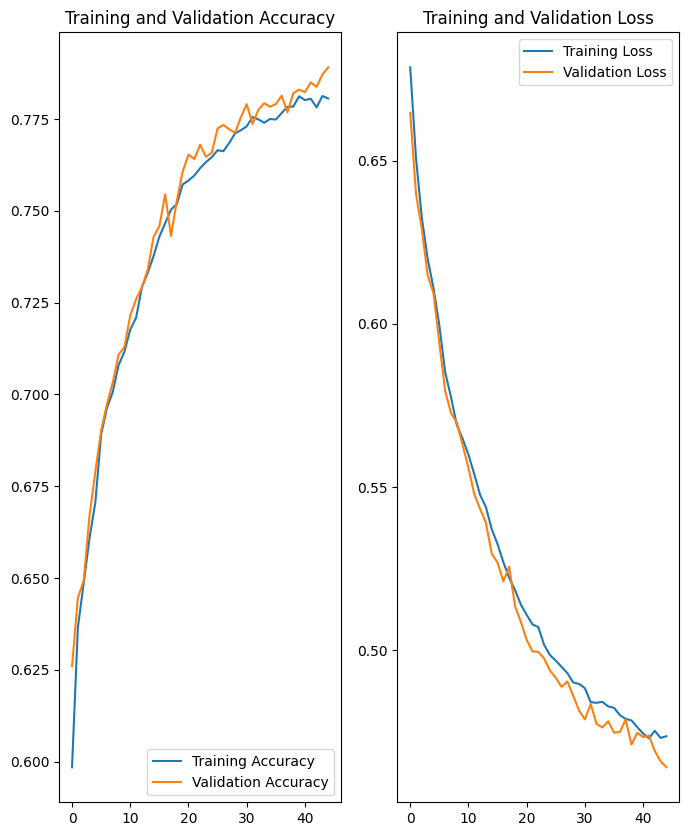

In [8]:
acc= vgg16_fit.history['accuracy']
val_acc = vgg16_fit.history['val_accuracy']

loss = vgg16_fit.history['loss']
val_loss = vgg16_fit.history['val_loss']

epochs_range = range(0, 45)

plt.figure(figsize=(8, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [9]:
print(str('Top Training Accuracy: ') + str(round(max(acc),4)))
print(str('Top Validation Accuracy: ') + str(round(max(val_acc),4)))

Top Training Accuracy: 0.7813
Top Validation Accuracy: 0.7891


In [10]:
model.save("GC weights/Frozen/mod1a-gs/mod1a_gs_frozen.h5")